c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


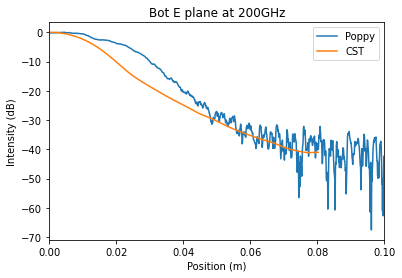

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


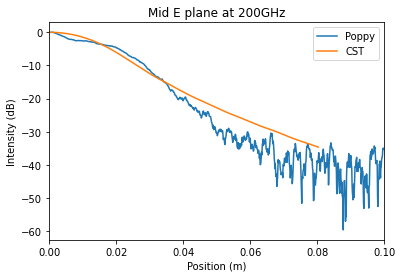

c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10
c:\users\siebe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


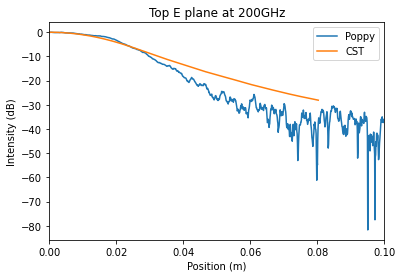

In [24]:
# From lens to tertiary in poppy @ 200GHz
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

ylens=-49.840796
ybot=-27.8737
ymid=-18.8737
ytop=-9.8737
# separations 
d = [(ybot-ylens)*u.cm,(ymid-ybot)*u.cm,(ytop-ymid)*u.cm]

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 200 * u.GHz #ffs = [510 * u.GHz] # [480*u.GHz,540*u.GHz]

ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=5*u.cm, wavelength=ll)
    
lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.0381*u.m)
wf *= ring # cold stop

wf.propagate_fresnel(d[0]) # propogate to bot
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_bot.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_bot.txt')
y, x = wf.coordinates()
plt.figure(1)
plt.title("Bot E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()

wf.propagate_fresnel(d[1]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_mid.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_mid.txt')
plt.figure(2)
plt.title("Mid E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()

wf.propagate_fresnel(d[2]) # propogate to mid
xpower=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeam_top.txt')
xpos=np.loadtxt('../EXCLAIM_Optics/EXCLAIM_Data/TO_run2.1/xbeampos_top.txt')
plt.figure(3)
plt.title("Top E plane at 200GHz")
plt.xlabel("Position (m)")
plt.ylabel("Intensity (dB)")
temp=np.max(10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:]))
plt.plot(x[wf.intensity.shape[1]//2,1024:], 10*np.log10(wf.intensity[wf.intensity.shape[1]//2,1024:])-temp,label='Poppy')
temp=np.max(10*np.log10(xpower))
plt.plot(xpos/100,10*np.log10(xpower)-temp,label='CST')
plt.xlim([0,0.1])
plt.legend()
plt.show()

